In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#read the data
data = pd.read_csv('Bank_Churn.csv')
original_data = data.copy()

#Keep a subset of data
data_subset = data.drop(['CustomerId', 'Surname', 'Exited',"Geography"], axis = 1)

data_clean = data_subset.copy()

data_clean.Gender = np.where(data_clean.Gender == 'Female', 1, 0)

#data_clean['ProductsPerYear'] = data_clean.NumOfProducts / data_clean.Tenure
data_clean['ProductsPerYear'] = np.where(data_clean.Tenure == 0, data_clean.NumOfProducts, data_clean.NumOfProducts / data_clean.Tenure)


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns = data_clean.columns)

print(df_scaled.columns)
#Ploting the inertia values and finding the elbow
kmeans5 = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans5.fit(df_scaled)

cluster_labels = kmeans5.labels_
original_data['Cluster'] = cluster_labels


data_final = pd.concat([data_clean, data.Exited, pd.Series(kmeans5.labels_, name='Cluster')], axis = 1)
#View the churn date (% of customers who exited) for each cluster
print(data_final.groupby('Cluster').mean())


# Example test data (replace with your actual values)
test_values = [650, 1, 39, 6, 125000, 1, 1, 0, 100000, 0.2]
# Column names matching the original training data
columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ProductsPerYear']

# Convert the test values into a 2D array (1 row, multiple columns)
test_values_reshaped = np.array(test_values).reshape(1, -1)  # reshape to 1 sample with multiple features


# Now scale the test data using the same scaler, convert to DataFrame with correct columns
test_data = pd.DataFrame(test_values_reshaped, columns=columns)
test_scaled = scaler.transform(test_data)

# Predict using the trained KMeans model (kmeans5)
predicted_cluster = kmeans5.predict(test_scaled)

# Output the predicted cluster
print(f"Predicted Cluster: {predicted_cluster[0]}")



Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ProductsPerYear'],
      dtype='object')
         CreditScore    Gender        Age    Tenure        Balance  \
Cluster                                                              
0         652.878910  0.476765  39.130474  1.270331   77180.695232   
1         649.107370  0.466788  38.389142  6.223537   12640.284252   
2         650.400448  0.433819  39.210526  5.994625  123281.854372   

         NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Cluster                                                              
0             1.710009   0.679178        0.546470     99373.353347   
1             1.831665   0.720958        0.509857    100636.831999   
2             1.217469   0.707279        0.503247    100045.957205   

         ProductsPerYear    Exited  
Cluster                             
0               1.294169  0.205541  
1          

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


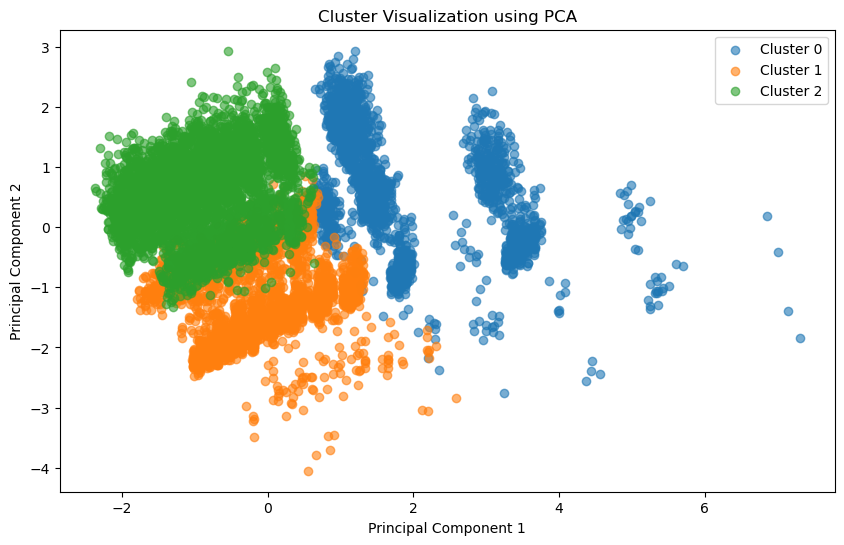

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

# Add cluster labels to the data
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans5.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(df_pca['Cluster'].unique()):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}', alpha=0.6
    )

plt.title("Cluster Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [45]:
original_data = data.copy()
cluster_labels = kmeans5.labels_
original_data['Cluster'] = cluster_labels
# Save the DataFrame to a CSV file
original_data.to_csv('clustered_data.csv', index=False)

In [48]:
import pickle

# Assume `scaler` and `kmeans5` are already fitted
# Save the scaler and the model to a single file
with open('scaler_and_model.pkl', 'wb') as f:
    pickle.dump({'scaler': scaler, 'model': kmeans5}, f)